In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Descriptive Statistics on Pollutants and AQI

In [2]:
df = pd.read_csv(r"C:\Users\VICTUS\OneDrive\Desktop\CA2 py.csv")

print("Dataset Info:")
print(df.info())

print("\nDescriptive Statistics:")
print(df.describe())

print("\nNull Values")
print(df.isnull().sum())

pollutant_columns = ['pollutant_min', 'pollutant_max', 'pollutant_avg']
df_pollutants = df[pollutant_columns]

print("\nPollutants and AQI Statistics:")
print(df_pollutants.describe())

df_clean = df.dropna()

print("\nAvg Pollution in First 5 Cities (No NaNs):")
a = df_clean.groupby('city')['pollutant_avg'].unique().head(5)
print(a)

print("\nAvg Pollution in Last 5 Cities (No NaNs):")
b = df_clean.groupby('city')['pollutant_avg'].unique().tail(5)
print(b)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222 entries, 0 to 3221
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        3222 non-null   object 
 1   state          3222 non-null   object 
 2   city           3222 non-null   object 
 3   station        3222 non-null   object 
 4   last_update    3222 non-null   object 
 5   latitude       3222 non-null   float64
 6   longitude      3222 non-null   float64
 7   pollutant_id   3222 non-null   object 
 8   pollutant_min  2848 non-null   float64
 9   pollutant_max  2848 non-null   float64
 10  pollutant_avg  2848 non-null   float64
dtypes: float64(5), object(6)
memory usage: 277.0+ KB
None

Descriptive Statistics:
          latitude    longitude  pollutant_min  pollutant_max  pollutant_avg
count  3222.000000  3222.000000    2848.000000    2848.000000    2848.000000
mean     22.187169    78.710509      21.364466      75.931180      41

Visualize Distribution of Pollutants

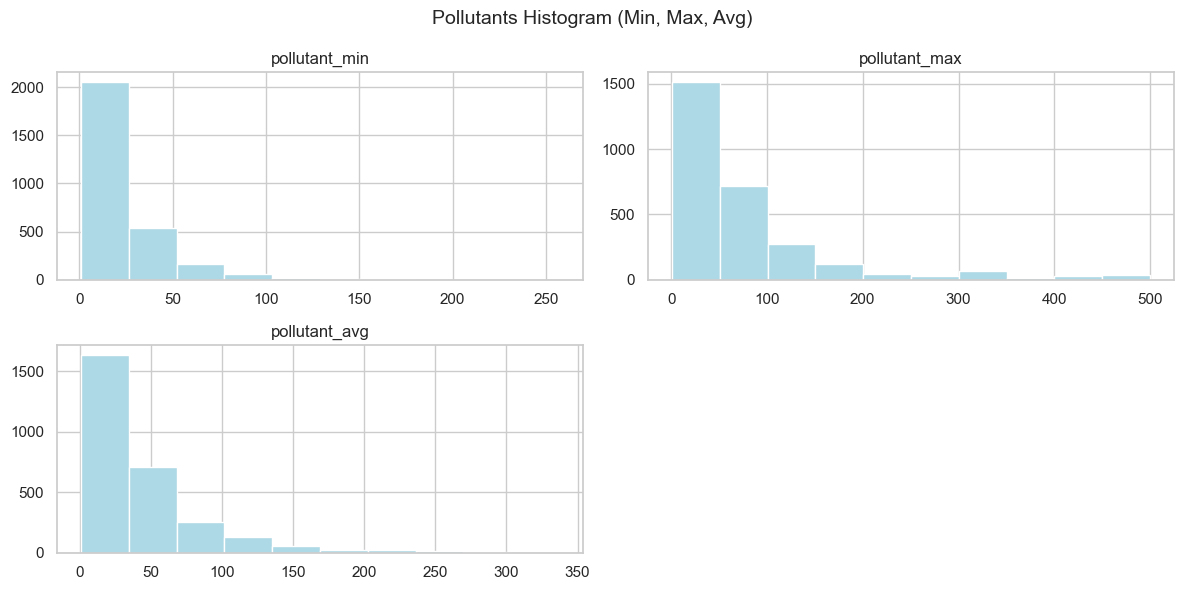

In [3]:
sns.set(style="whitegrid")

cols = ['pollutant_min', 'pollutant_max', 'pollutant_avg']

df[cols].hist(figsize=(12, 6), color='lightblue', edgecolor='white')
plt.suptitle("Pollutants Histogram (Min, Max, Avg)", fontsize=14)
plt.tight_layout()
plt.show()

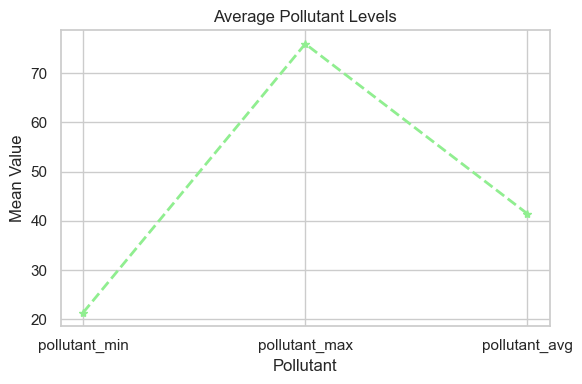

In [4]:
mean_values = df[cols].mean().round(2)

plt.figure(figsize=(6, 4))
plt.plot(mean_values.index, mean_values.values,marker='*',linestyle='--', color='lightgreen', linewidth=2)
plt.title("Average Pollutant Levels")
plt.ylabel("Mean Value")
plt.xlabel("Pollutant")
plt.tight_layout()
plt.show()

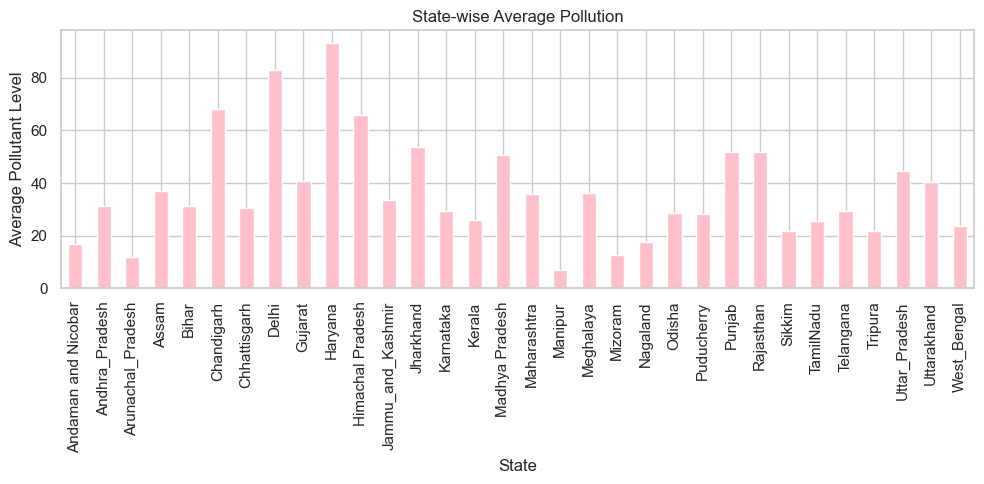

In [5]:
df.groupby('state')['pollutant_avg'].mean().plot(kind='bar', color='pink', edgecolor='white', figsize=(10, 5))
plt.title("State-wise Average Pollution")
plt.ylabel("Average Pollutant Level")
plt.xlabel("State")
plt.tight_layout()
plt.show()

Analyze Correlation Between Pollutants

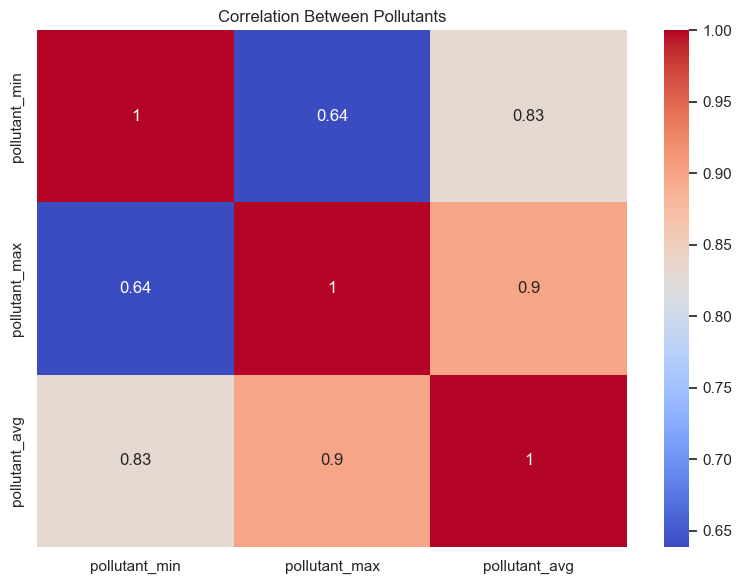

In [10]:
columns = ['pollutant_min', 'pollutant_max', 'pollutant_avg']
df_filtered = df[columns].dropna()

correlation = df_filtered.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Between Pollutants")
plt.tight_layout()
plt.show()

Compare Air Quality Across Locations

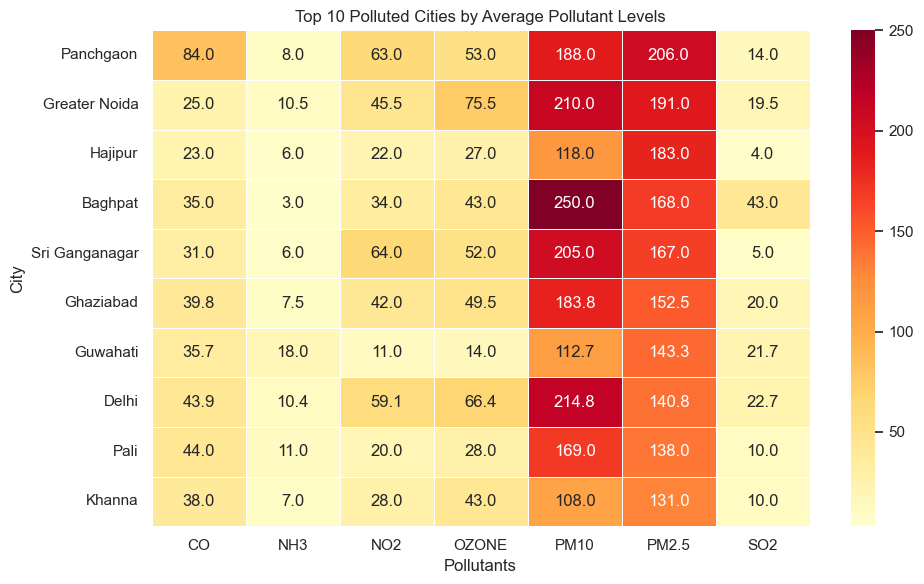

In [7]:
pollutants = df['pollutant_id'].unique()


pivot = df.pivot_table(index='city', columns='pollutant_id', values='pollutant_avg')


top_cities = pivot.sort_values('PM2.5', ascending=False).head(10)


plt.figure(figsize=(10, 6))
sns.heatmap(top_cities, annot=True, cmap='YlOrRd', fmt=".1f", linewidths=0.5)
plt.title('Top 10 Polluted Cities by Average Pollutant Levels')
plt.xlabel('Pollutants')
plt.ylabel('City')
plt.tight_layout()
plt.show()

Comparision of Min Pollution And Max Pollution

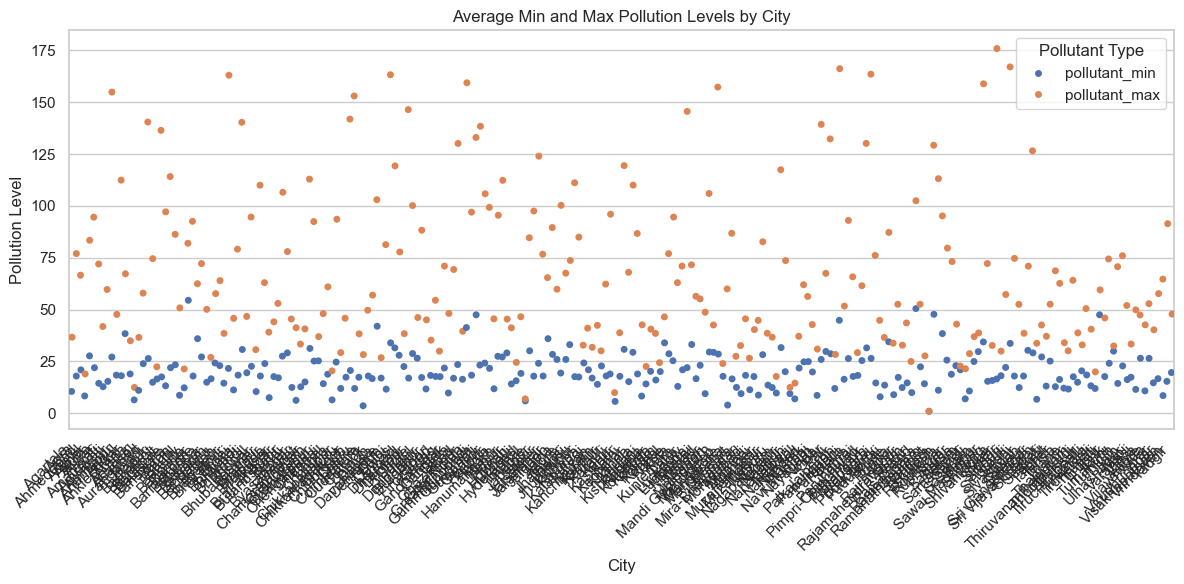

In [8]:
df_city = df[['city', 'pollutant_min', 'pollutant_max']].dropna()

city_pollution = df_city.groupby('city')[['pollutant_min', 'pollutant_max']].mean().reset_index()

city_pollution_melted = city_pollution.melt(id_vars='city', var_name='Pollutant Type', value_name='Value')

plt.figure(figsize=(12, 6))
sns.stripplot(data=city_pollution_melted, x='city', y='Value', hue='Pollutant Type')

plt.title("Average Min and Max Pollution Levels by City")
plt.xlabel("City")
plt.ylabel("Pollution Level")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()